<a href="https://colab.research.google.com/github/AnshumanMaity/MNREGA_Analysis_Using_KNN/blob/main/DM_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np 
import pandas as pd
import random 
from matplotlib import pyplot as plt 

label_dict = {
    0 : "good" , 
    1 : "average",
    2 : "below" 
}

In [10]:
#Generating the train data and train labels
train_data = []
train_labels = []
household=[]

for i in range(0,1000) : 
    houslehold_working_per = np.random.rand()
    average_wage = random.randint(100,500)
    expenditure = random.randint(100,500)
    worrking_days = random.randint(70,100)

    temp = [houslehold_working_per, average_wage , expenditure , worrking_days]
    train_data.append(temp)
    household.append(houslehold_working_per)

    if ((houslehold_working_per > 0.70) and (average_wage > 250) and (expenditure>150) and (worrking_days>60)) :
        train_labels.append(0)
    elif ((houslehold_working_per >= 0.50) and (average_wage >= 250) and (expenditure >= 350) and (20 <= worrking_days <= 50)) :
      train_labels.append(0)
    elif (( 0.40 <= houslehold_working_per <= 0.60) and (140<= average_wage <= 260) and (50 <= expenditure <= 150) and (30 <= worrking_days <= 60)) :
      train_labels.append(1)
    elif (( 0.20 <= houslehold_working_per <= 0.90) and (100 <= average_wage <= 500) and (100 <= expenditure <= 400) and (30 <= worrking_days <= 80)) :
      train_labels.append(1)
    elif (( 0.40 <= houslehold_working_per <= 0.70) and (200 <= average_wage <= 300) and (100 <= expenditure <= 200) and (worrking_days <= 50)) :
      train_labels.append(2)

    else :
        train_labels.append(2)

train_data[:10]

[[0.3660421240173315, 124, 357, 75],
 [0.7315852384320158, 422, 239, 81],
 [0.3052190069992964, 471, 494, 76],
 [0.9536959616103536, 314, 485, 74],
 [0.6356763268830982, 369, 413, 96],
 [0.5482746230093057, 142, 279, 71],
 [0.8154809945708823, 475, 316, 71],
 [0.7345810902121379, 426, 232, 90],
 [0.3932574015088178, 449, 459, 85],
 [0.456229605997981, 211, 180, 91]]

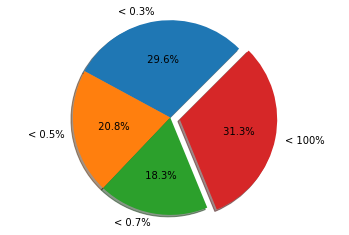

In [11]:
f03=0
f05=0
f07=0
f10=0
for i in range(0,1000):
  if(household[i]<0.3):
    f03 += 1
  elif(household[i]<0.5):
    f05 += 1
  elif(household[i]<0.7):
    f07 += 1
  elif(household[i]<=1):
    f10 += 1

labels='< 0.3%','< 0.5%','< 0.7%','< 100%'
sizes=[f03,f05,f07,f10]
explode=(0,0,0,0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%5.1f%%',shadow=True, startangle=45)

ax1.axis('equal')
plt.show()

In [12]:
print(train_labels.count(0))
print(train_labels.count(1))
print(train_labels.count(2))

171
130
699


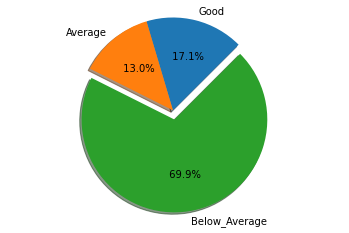

In [13]:

#Vizualizing the train data
labels='Good','Average','Below_Average'
sizes=[train_labels.count(0),train_labels.count(1),train_labels.count(2)]
explode=(0,0,0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%5.1f%%',shadow=True, startangle=45)
ax1.axis('equal')
plt.show()

In [14]:
#Generating the test data and test labels
test_data = []
test_labels = []

for i in range(0,100) : 
    houslehold_working_per = np.random.rand()
    average_wage = random.randint(100,500)
    expenditure = random.randint(100,500)
    worrking_days = random.randint(70,100)

    temp = [houslehold_working_per, average_wage , expenditure , worrking_days]
    test_data.append(temp)

    if ((houslehold_working_per > 0.70) and (average_wage > 250) and (expenditure>150) and (worrking_days>60)) :
        test_labels.append(0)
    elif ((houslehold_working_per >= 0.50) and (average_wage >= 250) and (expenditure >= 350) and (20 <= worrking_days <= 50)) :
      test_labels.append(0)
    elif (( 0.40 <= houslehold_working_per <= 0.60) and (140<= average_wage <= 260) and (50 <= expenditure <= 150) and (30 <= worrking_days <= 60)) :
      test_labels.append(1)
    elif (( 0.20 <= houslehold_working_per <= 0.90) and (100 <= average_wage <= 500) and (100 <= expenditure <= 400) and (30 <= worrking_days <= 80)) :
      test_labels.append(1)
    elif (( 0.40 <= houslehold_working_per <= 0.70) and (200 <= average_wage <= 300) and (100 <= expenditure <= 200) and (worrking_days <= 50)) :
      test_labels.append(2)

    else :
        test_labels.append(2)

test_data[:10]

[[0.028119529488672024, 389, 426, 95],
 [0.6332636342747716, 345, 188, 75],
 [0.7046170043160388, 321, 345, 90],
 [0.15949150998354789, 201, 255, 80],
 [0.3833651775675203, 157, 454, 75],
 [0.44749176115519496, 412, 205, 86],
 [0.21966442463778113, 416, 368, 73],
 [0.1676702633032292, 223, 190, 82],
 [0.9292165747389879, 233, 354, 94],
 [0.6154483058280866, 191, 128, 81]]

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_vs_accuracy = []

for k in range(2,10) : 
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(train_data,train_labels)

    predicted = neigh.predict(test_data)
    
    accuracy = accuracy_score(test_labels,predicted)

    k_vs_accuracy.append([k,accuracy])

k_vs_accuracy

[[2, 0.52],
 [3, 0.57],
 [4, 0.55],
 [5, 0.59],
 [6, 0.61],
 [7, 0.66],
 [8, 0.67],
 [9, 0.67]]

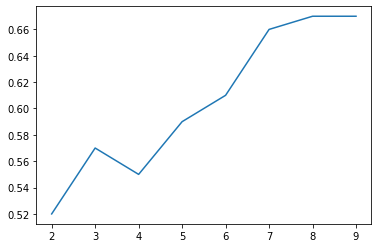

In [16]:
accuracy_plot = np.array(k_vs_accuracy)
x,y = accuracy_plot.T
plt.plot(x,y)


In [17]:
#TAking a fixed value of K

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

neigh = KNeighborsClassifier(n_neighbors=7)
neigh.fit(train_data,train_labels)

predicted = neigh.predict(test_data)

accuracy = accuracy_score(test_labels,predicted)
print("Accuracy of the model ",accuracy)


from sklearn.metrics import confusion_matrix
confusion_matrix(test_labels, predicted)

Accuracy of the model  0.66


array([[ 4,  0, 12],
       [ 4,  1, 11],
       [ 5,  2, 61]])

In [18]:
ft=neigh.predict(test_data)
print(ft)

[2 2 2 2 2 2 0 2 2 2 2 2 2 0 2 2 2 2 2 1 2 0 0 2 2 2 2 2 2 2 2 0 2 2 2 2 2
 2 2 0 0 2 0 2 2 2 0 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 1 0 2 2 0 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2]


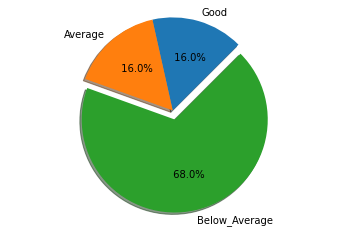

In [19]:
labels='Good','Average','Below_Average'
sizes=[test_labels.count(0),test_labels.count(1),test_labels.count(2)]
explode=(0,0,0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%5.1f%%',shadow=True, startangle=45)
ax1.axis('equal')
plt.show()